# DataFrame

## 1.Select
Pandas now supports three types of multi-axis indexing.

`.loc` is primarily label based, but may also be used with a **boolean array**. `.loc` will raise KeyError when the items are not found. Allowed inputs are:

1. A single label, e.g. `5` or `'a'` (Note that 5 is interpreted as a **label** of the index. This use is not an integer position along the index.).
2. A list or array of labels ['a', 'b', 'c'].
3. A slice object with labels `'a':'f'` (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index! See Slicing with labels and Endpoints are inclusive.)
4. A boolean array (any NA values will be treated as False).
5. A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).

`.iloc` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. `.iloc` will raise IndexError if a requested indexer is out-of-bounds. Allowed inputs are:

1. An integer e.g. 5.
2. A list or array of integers [4, 3, 0].
3. A slice object with ints 1:7.
4. A boolean array (any NA values will be treated as False).
5. A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).

`df[col_name]` is equivalent to `df.loc[:,col_name]`

In [1]:
import wooldridge as woo
df = woo.data("wage1")
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [2]:
df.iloc[0:5:2,:] # start:stop(exclusive):step

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.1,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
2,3.0,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
4,5.3,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [3]:
df.loc[:,"wage":"nonwhite":2] #start:stop(inclusive):step

,wage,exper,nonwhite
0,3.10,2,0
1,3.24,22,0
2,3.00,2,0
3,6.00,44,0
4,5.30,7,0
...,...,...,...
521,15.00,14,0
522,2.27,2,0
523,4.67,13,0
524,11.56,5,0


## 1.2 Select with conditions

Method 1: Note that the`.loc` selection method can take boolean arrays as input. We can therefore create boolean arrays as the condition for query.

In [4]:
df["wage"]>20

0      False
1      False
2      False
3      False
4      False
       ...  
521    False
522    False
523    False
524    False
525    False
Name: wage, Length: 526, dtype: bool

In [5]:
df.loc[df["wage"]>20,["wage","exper"]]

,wage,exper
14,22.200001,31
58,21.629999,8
111,24.980000,29
185,21.860001,24
228,22.860001,16


> Note: when combine multiple conditions using method 1. Use bitwise logic operators: `&`, `|`, `~`.

In [6]:
df.loc[(df["wage"]>20) & (df["exper"]>15) ,["wage","exper"]]

,wage,exper
14,22.200001,31
111,24.980000,29
185,21.860001,24
228,22.860001,16


Method 2: An alternative way is to use the [df.query("expression")](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) method.

In [7]:
df.query("wage>20")

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
14,22.200001,12,31,15,0,0,1,1,1,0,...,0,0,0,0,1,0,0,3.100092,961,225
58,21.629999,18,8,8,0,1,0,0,1,0,...,0,0,0,1,1,0,0,3.074081,64,64
111,24.980000,18,29,25,0,0,1,0,1,0,...,0,0,0,0,1,0,0,3.218076,841,625
185,21.860001,12,24,16,0,0,1,3,1,1,...,0,1,0,0,1,0,0,3.084659,576,256
228,22.860001,16,16,7,0,0,1,2,1,0,...,0,0,0,0,1,0,0,3.129389,256,49


## 1.3 Select a random sample

`df.sample(n=,frac=)` can be used to select a random sample with desired length or fraction

In [8]:
df.sample(100)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
435,9.42,14,23,0,0,1,1,2,0,0,...,0,0,1,0,0,0,0,2.242835,529,0
249,3.00,10,47,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1.098612,2209,0
338,12.22,16,10,2,0,0,0,0,1,0,...,0,0,0,1,1,0,0,2.503074,100,4
512,10.00,12,15,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,2.302585,225,0
188,4.44,12,3,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1.490654,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,3.85,16,5,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,1.348073,25,0
327,5.25,12,4,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,1.658228,16,0
333,11.98,18,8,10,0,0,1,2,1,0,...,1,0,0,0,1,0,0,2.483238,64,100
174,7.14,12,43,5,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1.965713,1849,25


In machine learning, `scikit learn` is commonly used to split the sample into train and test.

In [9]:
from sklearn.model_selection import train_test_split

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) takes an arbitrary number of arrays as argument and returns (train,test) tuples for each input array.

> a DataFrame can be viewed as a group of arrays.

In [10]:
df_train, df_test = train_test_split(df, train_size = 0.6)
df_train.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
510,3.000000,12,36,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1.098612,1296,1
433,3.810000,12,8,1,0,1,1,2,0,1,...,0,0,1,0,0,0,1,1.337629,64,1
242,4.750000,12,19,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,1.558145,361,0
228,22.860001,16,16,7,0,0,1,2,1,0,...,0,0,0,0,1,0,0,3.129389,256,49
225,2.950000,8,15,2,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1.081805,225,4


In [11]:
df_test.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
28,12.50,15,30,0,0,0,1,2,1,0,...,0,0,0,0,1,0,0,2.525729,900,0
288,2.00,9,2,0,0,0,0,3,0,1,...,0,1,0,0,0,0,1,0.693147,4,0
418,3.25,12,14,2,0,1,1,2,0,0,...,1,0,0,0,0,1,0,1.178655,196,4
269,6.00,12,22,8,0,0,0,2,1,0,...,0,1,0,0,1,0,0,1.791759,484,64
399,7.50,16,6,2,0,1,1,1,1,0,...,0,0,0,1,1,0,0,2.014903,36,4


> **Exercise**: load `wine` dataset from wooldridge.\
1.show the first 5 rows \
2.show the value in the 3rd row and the deaths column \
3.show rows where alcohol is greater than 3 \
4.show rows where alcohol is greater than 3 and deaths is less than or equal to 200 \
5.show rows with odd indexes and even-indexed columns \
6.select a random sample with 80% of observations \
7.try train_test_split with 70% training data and 30% in the test sample

In [1]:
import wooldridge as woo
df = woo.data("wine")

In [5]:
df.loc[(df["alcohol"]>3) & (df["deaths"]<=200),:]

,country,alcohol,deaths,heart,liver


In [7]:
df.query("alcohol>3 & deaths <=200")

,country,alcohol,deaths,heart,liver


In [9]:
df.sample(frac=0.8)

,country,alcohol,deaths,heart,liver
19,US,1.2,926,199,22.100000
12,Netherlands,1.8,773,167,9.200000
0,Australia,2.5,785,211,15.300000
2,Belg/Lux,2.9,883,131,20.700001
13,New Zealand,1.9,916,266,7.700000
1,Austria,3.9,863,167,45.599998
5,Finland,0.8,970,297,19.000000
7,Iceland,0.8,743,211,11.200000
8,Ireland,0.7,1000,300,6.500000
4,Denmark,2.9,971,220,23.900000


In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
df_tr, df_te = train_test_split(df, train_size=0.7)

In [14]:
df["new"] = df["deaths"]-1

In [15]:
df.head()

,country,alcohol,deaths,heart,liver,new
0,Australia,2.5,785,211,15.300000,784
1,Austria,3.9,863,167,45.599998,862
2,Belg/Lux,2.9,883,131,20.700001,882
3,Canada,2.4,793,191,16.400000,792
4,Denmark,2.9,971,220,23.900000,970


## 2.Insert

The "insert" operation in pandas is simple. Use `.loc[]` with a non-existent "key" (variable or index name) would perform setting with enlargement (insertion).

In [12]:
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [13]:
df["new"] = 1
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,1.131402,4,0,1
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,1,1.175573,484,4,1
2,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,1
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,1
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,1


When using operators on DataFrame columns (pd.Series), pandas would perform element-by-element calculation.

In [14]:
df["wage"]*2

0       6.200000
1       6.480000
2       6.000000
3      12.000000
4      10.600000
         ...    
521    30.000000
522     4.540000
523     9.340000
524    23.120001
525     7.000000
Name: wage, Length: 526, dtype: float64

In [15]:
df["wage"]*df["educ"]

0       34.099999
1       38.880000
2       33.000000
3       48.000000
4       63.600002
          ...    
521    240.000000
522     22.700000
523     70.050001
524    184.960007
525     49.000000
Length: 526, dtype: float64

In [16]:
df.loc[526] = 1
df.tail()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new
522,2.27,10,2,0,0,1,0,3,0,0,...,1,0,0,1,0,0,0.819780,4,0,1
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,1,0,0,1.541159,169,324,1
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,2.447551,25,1,1
525,3.50,14,5,4,1,1,0,2,0,0,...,0,0,1,0,1,0,1.252763,25,16,1
526,1.00,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1.000000,1,1,1


## 1.2 insert at a specific position
To insert a column at a specific position, use [df.insert()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html).

In [17]:
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,1.131402,4,0,1
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,1,1.175573,484,4,1
2,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,1
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,1
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,1


In [18]:
df.insert(0,"new2",1)

In [19]:
df.head()

,new2,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new
0,1,3.10,11,2,0,0,1,0,2,1,...,0,0,0,0,0,0,1.131402,4,0,1
1,1,3.24,12,22,2,0,1,1,3,1,...,0,1,0,0,0,1,1.175573,484,4,1
2,1,3.00,11,2,0,0,0,0,2,0,...,1,0,0,0,0,0,1.098612,4,0,1
3,1,6.00,8,44,28,0,0,1,0,1,...,0,0,0,0,1,0,1.791759,1936,784,1
4,1,5.30,12,7,2,0,0,1,1,0,...,0,0,0,0,0,0,1.667707,49,4,1


## 1.3 Append
[df.append()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html) can append rows of another df to the end of caller, returning a new DataFrame object.

In [20]:
df_train.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
510,3.000000,12,36,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1.098612,1296,1
433,3.810000,12,8,1,0,1,1,2,0,1,...,0,0,1,0,0,0,1,1.337629,64,1
242,4.750000,12,19,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,1.558145,361,0
228,22.860001,16,16,7,0,0,1,2,1,0,...,0,0,0,0,1,0,0,3.129389,256,49
225,2.950000,8,15,2,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1.081805,225,4


In [21]:
df_test.tail()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
6,11.25,18,15,7,0,0,0,0,1,0,...,0,1,0,0,1,0,0,2.420368,225,49
439,20.00,12,22,4,0,0,1,1,0,0,...,0,1,0,0,1,0,0,2.995732,484,16
352,3.45,12,6,5,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1.238374,36,25
369,3.00,10,2,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,1.098612,4,1
270,2.89,10,8,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1.061257,64,0


In [22]:
df_train.append(df_test)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
510,3.000000,12,36,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1.098612,1296,1
433,3.810000,12,8,1,0,1,1,2,0,1,...,0,0,1,0,0,0,1,1.337629,64,1
242,4.750000,12,19,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,1.558145,361,0
228,22.860001,16,16,7,0,0,1,2,1,0,...,0,0,0,0,1,0,0,3.129389,256,49
225,2.950000,8,15,2,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1.081805,225,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,11.250000,18,15,7,0,0,0,0,1,0,...,0,1,0,0,1,0,0,2.420368,225,49
439,20.000000,12,22,4,0,0,1,1,0,0,...,0,1,0,0,1,0,0,2.995732,484,16
352,3.450000,12,6,5,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1.238374,36,25
369,3.000000,10,2,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,1.098612,4,1


## 3.Update

There are only two simple steps to update values stored in a dataframe. Step 1: select, step 2: assign the new value(s).

In [23]:
df.loc[0,"wage"]

3.0999999046325684

In [24]:
df.loc[0,"wage"] = 2
df.loc[0,"wage"]

2.0

## 3.2 Update with conditions
There are two ways to update values with conditions.

Method 1: Use `.loc[]` to select with conditions and then assign new value(s)

In [25]:
df.loc[df["wage"]>20,"wage"]

14     22.200001
58     21.629999
111    24.980000
185    21.860001
228    22.860001
Name: wage, dtype: float64

In [26]:
index = df.loc[df["wage"]>20,"wage"].index

In [27]:
df.loc[df["wage"]>20,"wage"] = 20
df.loc[index,"wage"]

14     20.0
58     20.0
111    20.0
185    20.0
228    20.0
Name: wage, dtype: float64

Method 2: Use [df.where()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html), [df.mask()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html), or [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html).

- `Series.where(condition, new value)` replace values where the condition is False.
- `Series.mask(condition, new value)` replace values where the condition is True.
- `np.where(condition, x, y)` replace values with x when True, and with y when False

> Note: Series refers to one column in a DataFrame.

> Note: all 3 methods creates a new DataFrame, to replace the original data, you can either reassign the new DataFrame to `df`, or use set the `inplace` parameter to `True`.

In [28]:
# if wage == 20, replace the values with 21
df.query("wage==20")

,new2,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new
14,1,20.0,12,31,15,0,0,1,1,1,...,0,0,0,1,0,0,3.100092,961,225,1
58,1,20.0,18,8,8,0,1,0,0,1,...,0,0,1,1,0,0,3.074081,64,64,1
111,1,20.0,18,29,25,0,0,1,0,1,...,0,0,0,1,0,0,3.218076,841,625,1
185,1,20.0,12,24,16,0,0,1,3,1,...,1,0,0,1,0,0,3.084659,576,256,1
228,1,20.0,16,16,7,0,0,1,2,1,...,0,0,0,1,0,0,3.129389,256,49,1
439,1,20.0,12,22,4,0,0,1,1,0,...,1,0,0,1,0,0,2.995732,484,16,1


In [29]:
df["wage"].mask(df["wage"]==20,21, inplace=True)

In [30]:
df.query("wage==21")

,new2,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new
14,1,21.0,12,31,15,0,0,1,1,1,...,0,0,0,1,0,0,3.100092,961,225,1
58,1,21.0,18,8,8,0,1,0,0,1,...,0,0,1,1,0,0,3.074081,64,64,1
111,1,21.0,18,29,25,0,0,1,0,1,...,0,0,0,1,0,0,3.218076,841,625,1
185,1,21.0,12,24,16,0,0,1,3,1,...,1,0,0,1,0,0,3.084659,576,256,1
228,1,21.0,16,16,7,0,0,1,2,1,...,0,0,0,1,0,0,3.129389,256,49,1
439,1,21.0,12,22,4,0,0,1,1,0,...,1,0,0,1,0,0,2.995732,484,16,1


In [31]:
# if wage ==21, return 1, else return 0.
import numpy as np
np.where(df["wage"]==21,1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# insert this array as a new column of df
df["wage is 21"] = np.where(df["wage"]==21,1,0)
df.head()

,new2,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,...,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new,wage is 21
0,1,2.00,11,2,0,0,1,0,2,1,...,0,0,0,0,0,1.131402,4,0,1,0
1,1,3.24,12,22,2,0,1,1,3,1,...,1,0,0,0,1,1.175573,484,4,1,0
2,1,3.00,11,2,0,0,0,0,2,0,...,0,0,0,0,0,1.098612,4,0,1,0
3,1,6.00,8,44,28,0,0,1,0,1,...,0,0,0,1,0,1.791759,1936,784,1,0
4,1,5.30,12,7,2,0,0,1,1,0,...,0,0,0,0,0,1.667707,49,4,1,0


> **Exercise**: load the "wine" dataset \
1.add a column that is equal to `deaths` squared \
2.insert a column of "1"s as the first column \
3.add an indicator column showing whether the value of `heart` is greater than 100 \
4.update the value of `deaths` of `Canada` to 800 \
5.replace the value of `liver` with 30, if the original value is greater than 30

In [1]:
import wooldridge as woo
import pandas as pd
import numpy as np

In [2]:
df = woo.data("wine")

In [3]:
df["deathsq"] = df["deaths"]**2

In [4]:
df.insert(0,"ones",1)

In [ ]:
df["heart_gt_100"] = df["heart"]>100

In [5]:
df.loc[df["country"]=="Canada","deaths"] = 800

In [6]:
df["deaths"].mask(df["country"]=="Canada", 800)

0      785
1      863
2      883
3      800
4      971
5      970
6      751
7      743
8     1000
9      834
10     775
11     680
12     773
13     916
14     806
15     724
16     743
17     693
18     941
19     926
20     861
Name: deaths, dtype: int64

In [ ]:
df.loc[df["liver"]>30,"liver"] = 30

In [ ]:
df["liver"].mask(df["liver"]>30,30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ones     21 non-null     int64  
 1   country  21 non-null     object 
 2   alcohol  21 non-null     float64
 3   deaths   21 non-null     int64  
 4   heart    21 non-null     int64  
 5   liver    21 non-null     float64
 6   deathsq  21 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.3+ KB


In [8]:
df.shape

(21, 7)

In [10]:
df.shape[0]

21

In [9]:
len(df)

21

In [14]:
df.describe()

,ones,alcohol,deaths,heart,liver,deathsq
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.0,2.838095,830.380952,183.285714,21.033333,697851.285714
std,0.0,2.458145,96.396305,73.158829,11.958693,162550.584795
min,1.0,0.600000,680.000000,36.000000,6.500000,462400.000000
25%,1.0,1.200000,751.000000,131.000000,11.200000,564001.000000
50%,1.0,1.900000,806.000000,191.000000,19.000000,649636.000000
75%,1.0,2.900000,916.000000,220.000000,23.900000,839056.000000
max,1.0,9.100000,1000.000000,300.000000,45.599998,1000000.000000


array([[<AxesSubplot:title={'center':'ones'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'deaths'}>,
        <AxesSubplot:title={'center':'heart'}>],
       [<AxesSubplot:title={'center':'liver'}>,
        <AxesSubplot:title={'center':'deathsq'}>]], dtype=object)

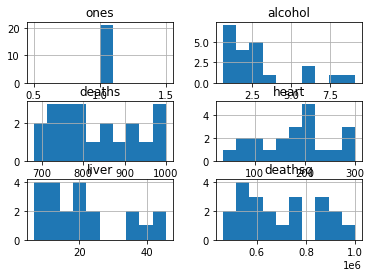

In [15]:
df.hist()

## 4. Delete

To delete (drop) a row or a column from a DataFrame, use the [df.drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method.

In [33]:
df.head()

,new2,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,...,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,new,wage is 21
0,1,2.00,11,2,0,0,1,0,2,1,...,0,0,0,0,0,1.131402,4,0,1,0
1,1,3.24,12,22,2,0,1,1,3,1,...,1,0,0,0,1,1.175573,484,4,1,0
2,1,3.00,11,2,0,0,0,0,2,0,...,0,0,0,0,0,1.098612,4,0,1,0
3,1,6.00,8,44,28,0,0,1,0,1,...,0,0,0,1,0,1.791759,1936,784,1,0
4,1,5.30,12,7,2,0,0,1,1,0,...,0,0,0,0,0,1.667707,49,4,1,0


In [34]:
df.drop(columns="new",inplace=True)

> Note: to prevent accidental deletions, df.drop() creates a new DataFrame instead of modifying the original df. To make real changes, assign the new DataFrame to `df` or set `inplace` to `True`.

In [35]:
df.head()

,new2,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,wage is 21
0,1,2.00,11,2,0,0,1,0,2,1,...,0,0,0,0,0,0,1.131402,4,0,0
1,1,3.24,12,22,2,0,1,1,3,1,...,0,1,0,0,0,1,1.175573,484,4,0
2,1,3.00,11,2,0,0,0,0,2,0,...,1,0,0,0,0,0,1.098612,4,0,0
3,1,6.00,8,44,28,0,0,1,0,1,...,0,0,0,0,1,0,1.791759,1936,784,0
4,1,5.30,12,7,2,0,0,1,1,0,...,0,0,0,0,0,0,1.667707,49,4,0


## 5. Create a new DataFrame

To manually create a new DataFrame object, we need to call the pd.DataFrame constructor - [pd.DataFrame()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

The `data` parameter of this constructor takes the following DataTypes: ndarray (structured or homogeneous), Iterable, dict, or DataFrame.

In [36]:
# ndarray
import pandas as pd
array = [[1,2],[3,4]]
pd.DataFrame(array)

,0,1
0,1,2
1,3,4


In [37]:
# dict
dc = {"x":[10,20],"y":[5,10]}
df2 = pd.DataFrame(dc)

> Dictionary: Dictionaries are used to store data values in key:value pairs
```python
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
```